<p style="font-size:32px;text-align:center"> <b>Social network Graph Link Prediction - Facebook Challenge</b> </p>

In [3]:
#Importing Libraries
# please do go through this python notebook: 
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost
import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [4]:
#reading
from pandas import read_hdf
df_final_train = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'test_df',mode='r')

In [5]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6'],
      dtype='object')

In [6]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [7]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

Estimators =  10 Train Score 0.9063252121775113 test Score 0.8745605278006858
Estimators =  50 Train Score 0.9205725512208812 test Score 0.9125653355634538
Estimators =  100 Train Score 0.9238690848446947 test Score 0.9141199714153599
Estimators =  250 Train Score 0.9239789348046863 test Score 0.9188007232664732
Estimators =  450 Train Score 0.9237190618658074 test Score 0.9161507685828595


Text(0.5,1,'Estimators vs score at depth of 5')

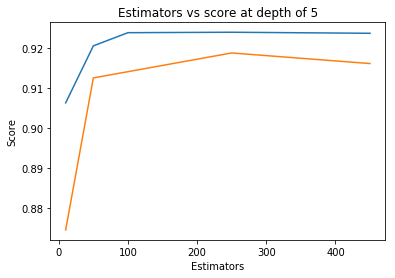

In [7]:
estimators = [10,50,100,250,450]
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

depth =  3 Train Score 0.8916120853581238 test Score 0.8687934859875491
depth =  9 Train Score 0.9572226298198419 test Score 0.9222953031452904
depth =  11 Train Score 0.9623451340902863 test Score 0.9252318758281279
depth =  15 Train Score 0.9634267621927706 test Score 0.9231288356496615
depth =  20 Train Score 0.9631629153051491 test Score 0.9235051024711141
depth =  35 Train Score 0.9634333127085721 test Score 0.9235601652753184
depth =  50 Train Score 0.9634333127085721 test Score 0.9235601652753184
depth =  70 Train Score 0.9634333127085721 test Score 0.9235601652753184
depth =  130 Train Score 0.9634333127085721 test Score 0.9235601652753184


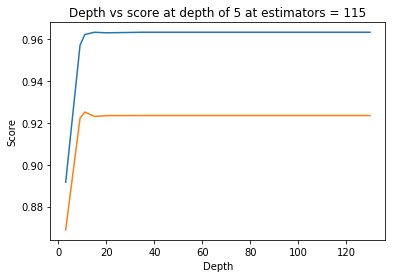

In [8]:
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for i in depths:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 115')
plt.show()

In [9]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state=25)

rf_random.fit(df_final_train,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean test scores [0.96225043 0.96215493 0.96057081 0.96194015 0.96330005]
mean train scores [0.96294922 0.96266735 0.96115674 0.96263457 0.96430539]


In [10]:
print(rf_random.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)


In [11]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

In [12]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [13]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9652533106548414
Test f1 score 0.9241678239279553


In [45]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


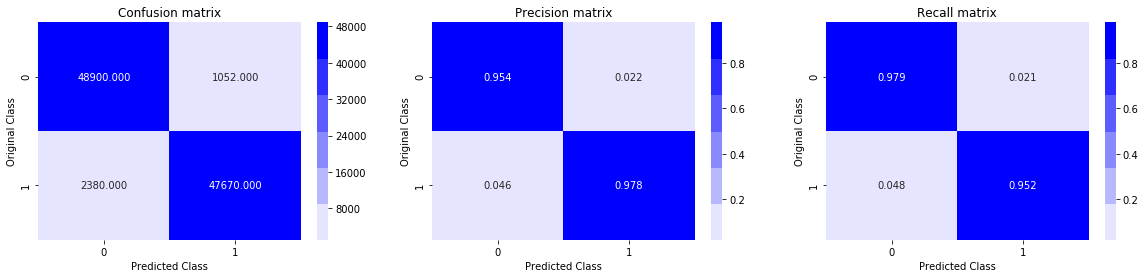

Test confusion_matrix


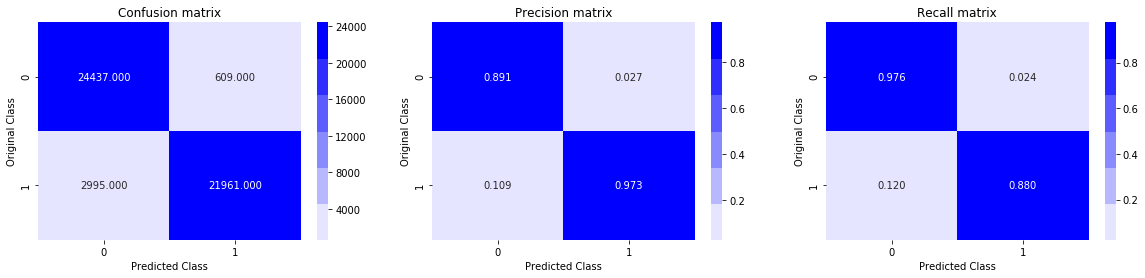

In [15]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

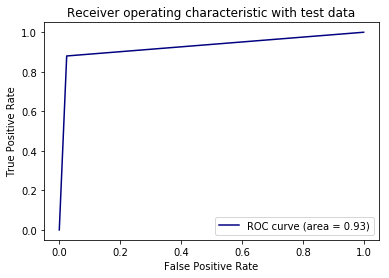

In [16]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

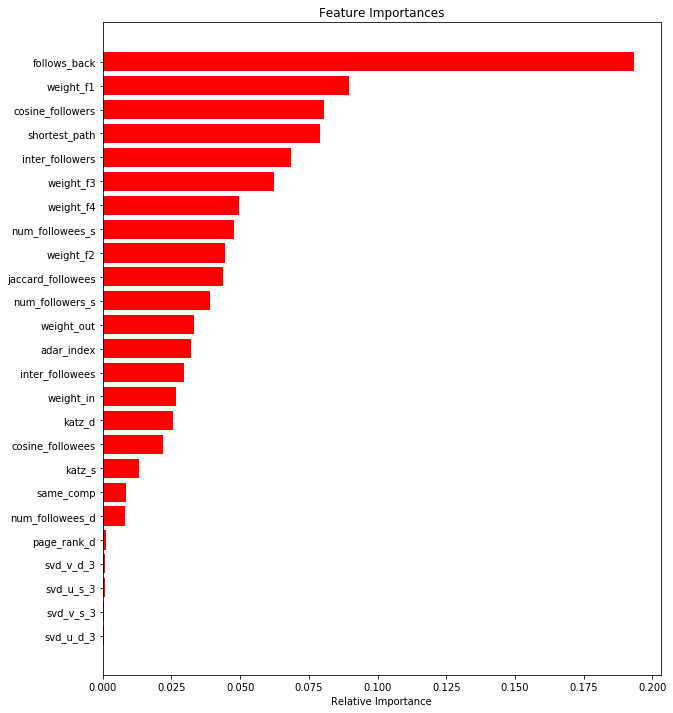

In [17]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [8]:
def compute_features_stage1(df_final):
    #calculating no of followers followees for source and destination
    #calculating intersection of followers and followees for source and destination
    num_followers_d=[]
    num_followees_d=[]
    for i,row in df_final.iterrows():
        try:
            s1=set(train_graph.predecessors(row['source_node']))
            s2=set(train_graph.successors(row['source_node']))
        except:
            s1 = set()
            s2 = set()
        try:
            d1=set(train_graph.predecessors(row['destination_node']))
            d2=set(train_graph.successors(row['destination_node']))
        except:
            d1 = set()
            d2 = set()
        num_followers_d.append(len(d1))
        num_followees_d.append(len(d2))

    
    return  num_followers_d, num_followees_d

In [9]:
num_followers_d,num_followees_d=compute_features_stage1(df_final_train)

In [10]:
df_final_train['num_followers_d']=num_followers_d

In [11]:
num_followers_d,num_followees_d=compute_features_stage1(df_final_test)

In [12]:
df_final_test['num_followers_d']=num_followers_d

In [13]:
df_final_train.columns

Index(['jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6',
       'num_followers_d'],
      dtype='object')

### Preferential Attachment for both followers and followees<br>
Preferential Attachment in below link
http://be.amazd.com/link-prediction/ <br>

In [14]:
#for train dataset
no_of_followers_sour=np.array(df_final_train['num_followers_s'])
no_of_followers_dest=np.array(df_final_train['num_followers_d'])
preferential_Attach_followers=[]
for i in range(len(no_of_followers_sour)):
    preferential_Attach_followers.append(no_of_followers_dest[i]*no_of_followers_sour[i])
df_final_train['preferential_followers']= preferential_Attach_followers
df_final_train.head()

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followees_s,num_followees_d,inter_followers,inter_followees,adar_index,...,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,num_followers_d,preferential_followers
0,0,0.000000,0.000000,0.000000,6,15,8,0,0,0.000000,...,8.108434e-13,1.719702e-14,-1.355368e-12,4.675307e-13,1.128591e-06,6.616550e-14,9.771077e-13,4.159752e-14,0,0
1,0,0.187135,0.028382,0.343828,94,61,142,11,32,16.362912,...,3.703479e-12,2.251737e-10,1.245101e-12,-1.636948e-10,-3.112650e-10,6.738902e-02,2.607801e-11,2.372904e-09,0,0
2,0,0.369565,0.156957,0.566038,28,41,22,26,17,10.991826,...,1.940403e-19,-3.365389e-19,-1.238370e-18,1.438175e-19,-1.852863e-19,-5.901864e-19,1.629341e-19,-2.572452e-19,0,0
3,0,0.000000,0.000000,0.000000,11,5,7,0,0,0.000000,...,1.513483e-12,4.498061e-13,-9.818087e-10,3.454672e-11,5.213635e-08,9.595823e-13,3.047045e-10,1.246592e-13,0,0
4,0,0.000000,0.000000,0.000000,1,11,3,0,0,0.000000,...,3.360247e-13,1.407670e-14,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0


In [15]:
#for test dataset
no_of_followers_sour=np.array(df_final_test['num_followers_s'])
no_of_followers_dest=np.array(df_final_test['num_followers_d'])
preferential_Attach_followers=[]
for i in range(len(no_of_followers_sour)):
    preferential_Attach_followers.append(no_of_followers_dest[i]*no_of_followers_sour[i])
df_final_test['preferential_followers']= preferential_Attach_followers
df_final_test.head()

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followees_s,num_followees_d,inter_followers,inter_followees,adar_index,...,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,num_followers_d,preferential_followers
0,0,0.0,0.029161,0.000000,14,6,9,1,0,0.000000,...,4.341620e-13,5.535503e-14,-9.994076e-10,5.791910e-10,3.512364e-07,2.486658e-09,2.771146e-09,1.727694e-12,0,0
1,0,0.0,0.000000,0.000000,17,1,19,0,0,0.000000,...,3.600957e-13,4.701436e-15,-9.360516e-12,3.206809e-10,4.668696e-08,6.665777e-12,1.495979e-10,9.836670e-14,0,0
2,0,0.0,0.000000,0.000000,10,16,9,0,0,0.000000,...,2.740535e-13,4.199834e-14,-4.253075e-13,4.789463e-13,3.479824e-07,1.630549e-13,3.954708e-13,3.875785e-14,0,0
3,0,0.0,0.000000,0.000000,37,10,34,0,0,0.000000,...,4.020707e-12,2.817657e-13,-2.162590e-11,6.939194e-12,1.879861e-05,4.384816e-12,1.239414e-11,6.483485e-13,0,0
4,0,0.2,0.042767,0.347833,27,15,27,4,7,6.136433,...,1.154623e-12,9.656662e-14,-8.742904e-12,7.467370e-12,1.256880e-05,3.636983e-12,3.948463e-12,2.415863e-13,0,0


In [16]:
#for train dataset
no_of_followers_sour=np.array(df_final_train['num_followees_s'])
no_of_followers_dest=np.array(df_final_train['num_followees_d'])
preferential_Attach_followees=[]
for i in range(len(no_of_followers_sour)):
    preferential_Attach_followees.append(no_of_followers_dest[i]*no_of_followers_sour[i])
df_final_train['preferential_followees']= preferential_Attach_followees
df_final_train.head()

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followees_s,num_followees_d,inter_followers,inter_followees,adar_index,...,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,num_followers_d,preferential_followers,preferential_followees
0,0,0.000000,0.000000,0.000000,6,15,8,0,0,0.000000,...,1.719702e-14,-1.355368e-12,4.675307e-13,1.128591e-06,6.616550e-14,9.771077e-13,4.159752e-14,0,0,120
1,0,0.187135,0.028382,0.343828,94,61,142,11,32,16.362912,...,2.251737e-10,1.245101e-12,-1.636948e-10,-3.112650e-10,6.738902e-02,2.607801e-11,2.372904e-09,0,0,8662
2,0,0.369565,0.156957,0.566038,28,41,22,26,17,10.991826,...,-3.365389e-19,-1.238370e-18,1.438175e-19,-1.852863e-19,-5.901864e-19,1.629341e-19,-2.572452e-19,0,0,902
3,0,0.000000,0.000000,0.000000,11,5,7,0,0,0.000000,...,4.498061e-13,-9.818087e-10,3.454672e-11,5.213635e-08,9.595823e-13,3.047045e-10,1.246592e-13,0,0,35
4,0,0.000000,0.000000,0.000000,1,11,3,0,0,0.000000,...,1.407670e-14,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0,33


In [18]:
df_final_train.shape

(100002, 54)

In [19]:
#for test dataset
no_of_followers_sour=np.array(df_final_test['num_followees_s'])
no_of_followers_dest=np.array(df_final_test['num_followees_d'])
preferential_Attach_followees=[]
for i in range(len(no_of_followers_sour)):
    preferential_Attach_followees.append(no_of_followers_dest[i]*no_of_followers_sour[i])
df_final_test['preferential_followees']= preferential_Attach_followees
df_final_test.head()

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followees_s,num_followees_d,inter_followers,inter_followees,adar_index,...,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,num_followers_d,preferential_followers,preferential_followees
0,0,0.0,0.029161,0.000000,14,6,9,1,0,0.000000,...,5.535503e-14,-9.994076e-10,5.791910e-10,3.512364e-07,2.486658e-09,2.771146e-09,1.727694e-12,0,0,54
1,0,0.0,0.000000,0.000000,17,1,19,0,0,0.000000,...,4.701436e-15,-9.360516e-12,3.206809e-10,4.668696e-08,6.665777e-12,1.495979e-10,9.836670e-14,0,0,19
2,0,0.0,0.000000,0.000000,10,16,9,0,0,0.000000,...,4.199834e-14,-4.253075e-13,4.789463e-13,3.479824e-07,1.630549e-13,3.954708e-13,3.875785e-14,0,0,144
3,0,0.0,0.000000,0.000000,37,10,34,0,0,0.000000,...,2.817657e-13,-2.162590e-11,6.939194e-12,1.879861e-05,4.384816e-12,1.239414e-11,6.483485e-13,0,0,340
4,0,0.2,0.042767,0.347833,27,15,27,4,7,6.136433,...,9.656662e-14,-8.742904e-12,7.467370e-12,1.256880e-05,3.636983e-12,3.948463e-12,2.415863e-13,0,0,405


In [20]:
df_final_train.shape

(100002, 54)

In [21]:
df_final_test.shape

(50002, 54)

### Adding SVD_Dot feature

 svd_dot is simply the  Dot product of sourse node svd and destination node svd features<br>
 you can read about this in below pdf 
https://storage.googleapis.com/kaggle-forum-message-attachments/2594/supervised_link_prediction.pdf<br>

In [22]:
svd_dot_u=[]
for i in range(len(np.array(df_final_train['svd_u_s_1']))):
    sour=[]
    dest=[]
    sour.append(np.array(df_final_train['svd_u_s_1'][i]))
    sour.append(np.array(df_final_train['svd_u_s_2'][i]))
    sour.append(np.array(df_final_train['svd_u_s_3'][i]))
    sour.append(np.array(df_final_train['svd_u_s_4'][i]))
    sour.append(np.array(df_final_train['svd_u_s_5'][i]))
    sour.append(np.array(df_final_train['svd_u_s_6'][i]))
    
    dest.append(np.array(df_final_train['svd_u_d_1'][i]))
    dest.append(np.array(df_final_train['svd_u_d_2'][i]))
    dest.append(np.array(df_final_train['svd_u_d_3'][i]))
    dest.append(np.array(df_final_train['svd_u_d_4'][i]))
    dest.append(np.array(df_final_train['svd_u_d_5'][i]))
    dest.append(np.array(df_final_train['svd_u_d_6'][i]))
    
    svd_dot_u.append(np.dot(sour,dest))
df_final_train['svd_dot_u']=svd_dot_u    


In [23]:
svd_dot_feature=[]
for i in range(len(np.array(df_final_train['svd_v_s_1']))):
    sour=[]
    dest=[]
    
    sour.append(np.array(df_final_train['svd_v_s_1'][i]))
    sour.append(np.array(df_final_train['svd_v_s_2'][i]))
    sour.append(np.array(df_final_train['svd_v_s_3'][i]))
    sour.append(np.array(df_final_train['svd_v_s_4'][i]))
    sour.append(np.array(df_final_train['svd_v_s_5'][i]))
    sour.append(np.array(df_final_train['svd_v_s_6'][i]))
    
    dest.append(np.array(df_final_train['svd_v_d_1'][i]))
    dest.append(np.array(df_final_train['svd_v_d_2'][i]))
    dest.append(np.array(df_final_train['svd_v_d_3'][i]))
    dest.append(np.array(df_final_train['svd_v_d_4'][i]))
    dest.append(np.array(df_final_train['svd_v_d_5'][i]))
    dest.append(np.array(df_final_train['svd_v_d_6'][i]))
    svd_dot_feature.append(np.dot(sour,dest))
df_final_train['svd_dot_v']=svd_dot_feature    


In [24]:
df_final_train.shape

(100002, 56)

In [25]:
df_final_train.columns

Index(['jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6',
       'num_followers_d', 'preferential_followers', 'preferential_followees',
       'svd_dot_u', 'svd_dot_v'],
      dtype='object')

In [26]:
svd_dot_feature=[]
for i in range(len(np.array(df_final_test['svd_u_s_1']))):
    sour=[]
    dest=[]
    sour.append(np.array(df_final_test['svd_u_s_1'][i]))
    sour.append(np.array(df_final_test['svd_u_s_2'][i]))
    sour.append(np.array(df_final_test['svd_u_s_3'][i]))
    sour.append(np.array(df_final_test['svd_u_s_4'][i]))
    sour.append(np.array(df_final_test['svd_u_s_5'][i]))
    sour.append(np.array(df_final_test['svd_u_s_6'][i]))
    
    dest.append(np.array(df_final_test['svd_u_d_1'][i]))
    dest.append(np.array(df_final_test['svd_u_d_2'][i]))
    dest.append(np.array(df_final_test['svd_u_d_3'][i]))
    dest.append(np.array(df_final_test['svd_u_d_4'][i]))
    dest.append(np.array(df_final_test['svd_u_d_5'][i]))
    dest.append(np.array(df_final_test['svd_u_d_6'][i]))
    
    svd_dot_feature.append(np.dot(sour,dest))
df_final_test['svd_dot_u']=svd_dot_feature    


In [27]:
svd_dot_feature=[]
for i in range(len(np.array(df_final_test['svd_u_s_1']))):
    sour=[]
    dest=[]
    
    sour.append(np.array(df_final_test['svd_v_s_1'][i]))
    sour.append(np.array(df_final_test['svd_v_s_2'][i]))
    sour.append(np.array(df_final_test['svd_v_s_3'][i]))
    sour.append(np.array(df_final_test['svd_v_s_4'][i]))
    sour.append(np.array(df_final_test['svd_v_s_5'][i]))
    sour.append(np.array(df_final_test['svd_v_s_6'][i]))
    
    dest.append(np.array(df_final_test['svd_v_d_1'][i]))
    dest.append(np.array(df_final_test['svd_v_d_2'][i]))
    dest.append(np.array(df_final_test['svd_v_d_3'][i]))
    dest.append(np.array(df_final_test['svd_v_d_4'][i]))
    dest.append(np.array(df_final_test['svd_v_d_5'][i]))
    dest.append(np.array(df_final_test['svd_v_d_6'][i]))
    svd_dot_feature.append(np.dot(sour,dest))
df_final_test['svd_dot_v']=svd_dot_feature    


In [30]:
df_final_test.shape

(50002, 56)

In [31]:
df_final_test.columns

Index(['jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6',
       'num_followers_d', 'preferential_followers', 'preferential_followees',
       'svd_dot_u', 'svd_dot_v'],
      dtype='object')

In [38]:
df_final_test.shape

(50002, 56)

In [37]:
y_test.shape

(50002,)

In [39]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform
import xgboost as xgbo
xgb = xgbo.XGBClassifier()
param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15)
              }
model_1 = RandomizedSearchCV(xgb, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state=25)


model_1.fit(df_final_train,y_train)
print('mean test scores',model_1.cv_results_['mean_test_score'])
print('mean train scores',model_1.cv_results_['mean_train_score'])


mean test scores [0.97996105 0.9802039  0.98026428 0.98059123 0.98057109]
mean train scores [0.99993339 0.99996337 0.99270838 0.99535344 0.99565832]


In [40]:
print(model_1.best_estimator_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=11, min_child_weight=1, missing=None, n_estimators=110,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


In [41]:
xgb=xgbo.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=11, min_child_weight=1, missing=None, n_estimators=110,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [42]:
xgb.fit(df_final_train,y_train)
y_train_pred = xgb.predict(df_final_train)
y_test_pred = xgb.predict(df_final_test)

In [43]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9947848761408083
Test f1 score 0.9267070192205585


Train confusion_matrix


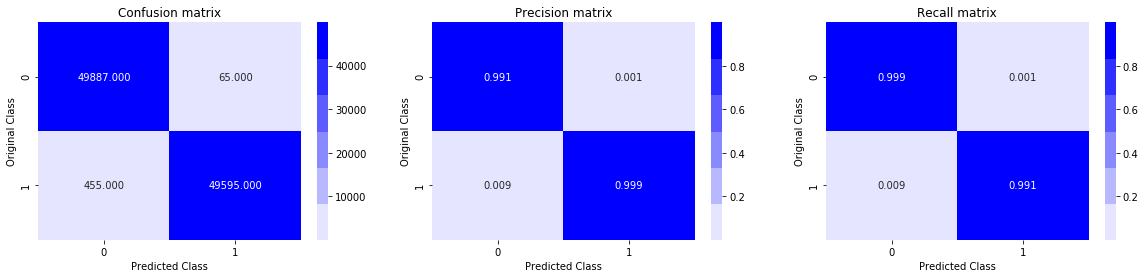

Test confusion_matrix


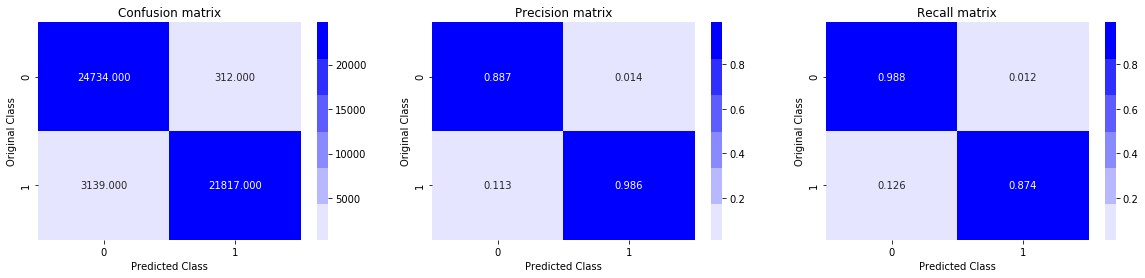

In [46]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

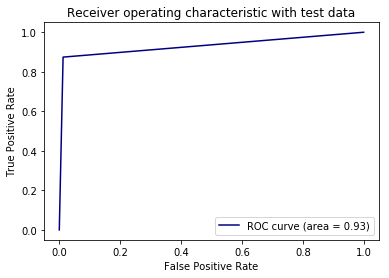

In [47]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

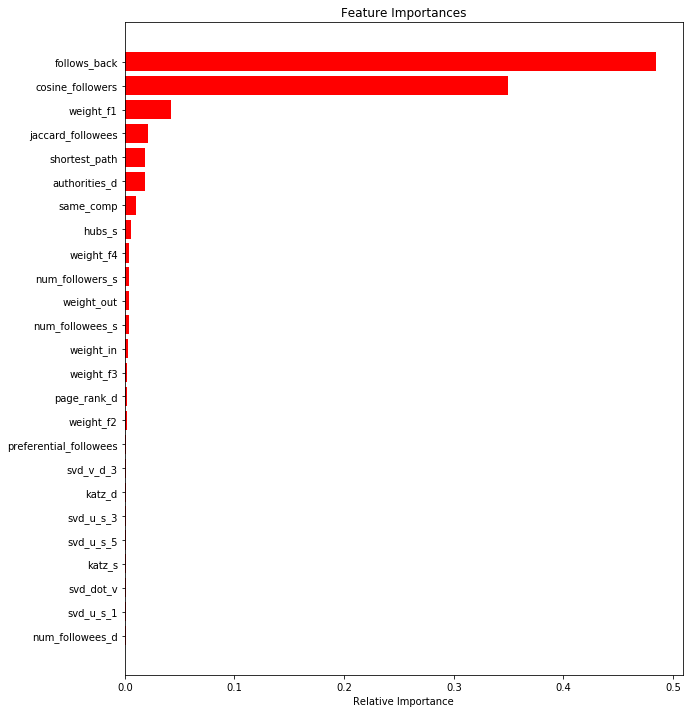

In [48]:
features = df_final_train.columns
importances = xgb.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Conclusion

In [49]:
from prettytable import PrettyTable 
t= PrettyTable()
t.field_names = ["Model", "n_estimators", "max_depth", "Train f1-Score","Test f1-Score"]
t.add_row(['Random Forest','121','14','0.965','0.921'])
t.add_row(['XGBOOST','112','11','0.995','0.927'])
print(t)


+---------------+--------------+-----------+----------------+---------------+
|     Model     | n_estimators | max_depth | Train f1-Score | Test f1-Score |
+---------------+--------------+-----------+----------------+---------------+
| Random Forest |     121      |     14    |     0.965      |     0.921     |
|    XGBOOST    |     112      |     11    |     0.995      |     0.927     |
+---------------+--------------+-----------+----------------+---------------+


### Overall Understanding from beggining the Conclusion

1) In the given dataset we have only two features.

2) with two features we cannot build an effective ML model.

3) so we went on feature Engineering to create some features which may add value to model.

4) In that we have created features like preferential_Attachment , SVD_Dot,no_of_followees,No_of_followers,pagerank,cosine
    similarity etc

5) As we have fairly enough no of features and non-linear data,models Random Forest and XGBoost works fairly with this type    of non-linear data as we know.

6) So, After creating enough no of features we built two models Random Forest and XGBoost and comapared the results with f1        score.

7) All the results were displayed by plots and confusion matrix and also with pretty table